In [35]:
import numpy as np
import time
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

## Basic use of Python nested lists

In [136]:
def fill(coords,board):
    h = len(board)
    w = len(board[0])
    for c in coords:
        if c[0] < 0 or c[0] >= h or c[1] < 0 or c[1] >= w:
            print(f'({c[0]},{c[1]}) failed since ouside of board')
        else:
            board[c[0]][c[1]] = 1.
    return board

def val(board,i,j,h,w):
    if i < 0 or i >= h or j < 0 or j >= w:
        return 0.
    else:
        return board[i][j]
    
def play(board,i,j,h,w):
    neigh = int(sum([val(board,n[0],n[1],h,w) for n in [(i-1,j-1),(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1)]]))
    if val(board,i,j,h,w) == 1. and (neigh == 2 or neigh == 3):
        return 1.
    if val(board,i,j,h,w) == 0. and neigh == 3:
        return 1.
    return 0.

In [137]:
def run(start_state, simulation_time, print_states=False):
    h = len(start_state)
    w = len(start_state[0])
    current_board = copy.deepcopy(start_state)
    
    for _ in range(0,simulation_time):
        if print_states:
            print(np.array(current_board))
        updated_board =  copy.deepcopy(current_board)
        for i in range(h):
            for j in range(w):
                updated_board[i][j] = play(current_board, i, j, h, w)
        current_board = copy.deepcopy(updated_board)
        # time.sleep(0.5)
    return current_board
        
    

In [138]:
glider = [(2,0),(1,2),(2,1),(2,2),(0,1)]
blinker = [(0,1),(1,1),(2,1)]
block = [(1,1),(1,2),(2,1),(2,2)]

In [139]:
b = np.zeros((10,10)).tolist()
fill(blinker,b)
print(np.array(run(b,20,print_states=False)))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Working with matplotlib to make animation

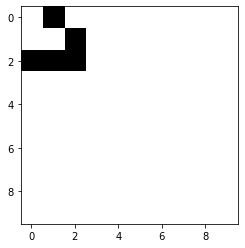

In [140]:
b = np.zeros((10,10)).tolist()
b = fill(glider, b)
plt.imshow(b, cmap='Greys', interpolation='nearest')

In [141]:
def run_animated(start_state, simulation_time, print_states=False, show_anim=True, save_file=False, interval = 200):
    h = len(start_state)
    w = len(start_state[0])    
    fig = plt.figure()
    im = plt.imshow(start_state, cmap='Greys',  interpolation='nearest')
    
    def init():
        plt.show()
        return im,
        
    def update(frame):
        if frame != 0:
            current_board = im.get_array()
            updated_board = np.zeros((h,w)).tolist()
            for i in range(h):
                for j in range(w):
                    updated_board[i][j] = play(current_board, i, j, h, w)
            im.set_array(updated_board)
        return im,
        
    anim = FuncAnimation(fig, update, init_func=init, frames=simulation_time, interval=interval)
    
    if show_anim:
        display(HTML(anim.to_jshtml()))
        
    if save_file:
        anim.save('gol.mp4')
        
    
    return anim

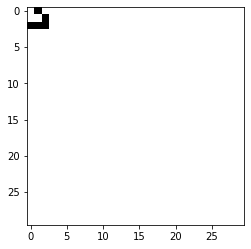

In [142]:
b = np.zeros((30,30)).tolist()

b = fill(glider, b)

anim = run_animated(b, 20)


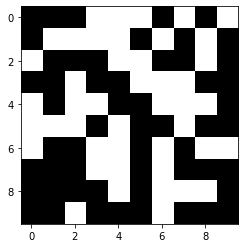

In [143]:
b = np.random.randint(2, size=(10,10)).tolist()
anim = run_animated(b, 20)

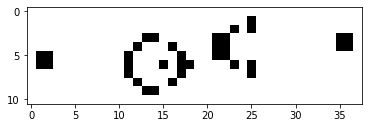

In [153]:
b = np.zeros((11,38)).tolist()
gospel_glider_gun = [(5,1),(5,2),(6,1),(6,2),
                     (5,11),(6,11),(7,11),(4,12),(3,13),(3,14),(6,15),(4,16),(5,17),(6,17),(6,18),(7,17),(8,16),(9,14),(9,13),(8,12),
                     (3,21),(4,21),(5,21),(3,22),(4,22),(5,22),(2,23),(6,23),(1,25),(2,25),(6,25),(7,25),
                     (3,35),(3,36),(4,35),(4,36)]

b = fill(gospel_glider_gun, b)
plt.imshow(b, cmap='Greys', interpolation='nearest')

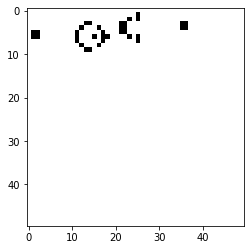

In [154]:
b = np.zeros((50,50)).tolist()
b = fill(gospel_glider_gun, b)
anim = run_animated(b, 100)

## Optimization

### Making the canvas larger than the actual visual one

### Using sparse arrays